In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from scipy.stats import skew , kurtosis
import statsmodels.api as sm
from scipy.stats import shapiro # Used to check if dataset is skewed or not 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE # To check weather the dataset is good enough for making clusters 

In [2]:
warnings.filterwarnings('ignore')

# Options for pandas : 
pd.set_option('display.max_rows' , 200)
pd.set_option('display.max_columns' , 50)
pd.set_option('display.width' , None)


In [3]:
# Lets read the dataset and do some basic EDA like check mean median mode etc
df_red  = pd.read_csv('winequality-red.csv')


In [4]:
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


we can see all the columns are cramped up in a single column and before doing any analysis we need to seperate the columns. 

In [5]:
base_column_name  = 'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

df_red['fixed_acidity'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[0])
df_red['volatile_acidity'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[1])
df_red['citric_acid'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[2])
df_red['residual_sugar'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[3])
df_red['chlorides'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[4])
df_red['free_sulfur_dioxide'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[5])
df_red['total_sulfur_dioxide'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[6])
df_red['density'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[7])
df_red['ph'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[8])
df_red['sulphates'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[9])
df_red['alcohol'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[10])
df_red['quality'] = df_red[base_column_name].apply(lambda x : str(x).split(";")[11])

df_red.head()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
df = df_red.drop(base_column_name, axis=1)

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed_acidity         1599 non-null   object
 1   volatile_acidity      1599 non-null   object
 2   citric_acid           1599 non-null   object
 3   residual_sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free_sulfur_dioxide   1599 non-null   object
 6   total_sulfur_dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   ph                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


The values are object type and we would be needing to change them back to the float values.

In [9]:
column_names  = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality']


for name in column_names:
    df[name] = df[name].astype(float)


# we can also use the function as pd.tonumeric(df[name] , erros  =coerce) 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.shape

(1599, 12)

In [13]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(240)

# Univariate Analysis

Checks for the univariate analysis :
<br>

1. <input type="checkbox"> Mean Median Mode and SD for every column </input>
2. <input type="checkbox"> Check for the IQR and Quartiles and Percentiles  </input>
3. <input type="checkbox"> General Graphs to Make for columns - Histogram, Box Plot ( Check for the outlier ) Violin Plot</input>
<br>
4. <input type="checkbox"> Skewness and Kurtosis Analysis ( check for bell curve and Peak as well )</input>
<br>
5. <input type="checkbox"> Optional - Check for QQ plot and shapio test and confirm if the data is distributted normally - ask if QIR to be done before or later</input>
6. <input type="checkbox"> Optional - Make pivot table and window functions and later make a categorical column based on one column and make bins for the data for machine learning </input>



The Columns considered for Univariate Analysis  : 

1. Quality
2. Alcohol
3. PH
4. Sugar
5. Citric Acid

In [15]:
# Check the mean median mode for the univariate columns :

print(f'Mean for Quality :  {df.quality.mean()}')
print(f'Median for Quality: {df.quality.median()}')
print(f'Mode for Quality: {df.quality.mode()}')
print(f'Standard Deviation for Quality: {df.quality.std()}')
print("")
print(f"Mean for Alcohol :{df.alcohol.mean()}")
print(f"Median for Alcohol : {df.alcohol.median()}")
print(f"Mode for Alcohol : {df.alcohol.mode()}")
print(f"Standard Deviation for Alcohol : {df.alcohol.std()}")
print("")
print(f"Mean for PH : {df.ph.mean()}")
print(f"Median for PH: {df.ph.median()}")
print(f"Mode for PH : {df.ph.mode()}")
print(f"Standard Deviation for PH {df.ph.std()}")
print("")
print(f"Mean for Sugar {df.residual_sugar.mean()}")
print(f"Median for Sugar {df.residual_sugar.median()}")
print(f"Mode for Sugar {df.residual_sugar.mode()}")
print(f"Standard Deviation for Sugar {df.residual_sugar.std()}")
print("")
print(f"Mean for Cirtic Acid :{df.citric_acid.mean()}")
print(f"Median for Citric Acid : {df.citric_acid.median()}")
print(f"Mode for Citric Acid : {df.citric_acid.mode()}")
print(f"Standard Deviation for Citric Acid {df.citric_acid.std()}")



Mean for Quality :  5.6360225140712945
Median for Quality: 6.0
Mode for Quality: 0    5.0
Name: quality, dtype: float64
Standard Deviation for Quality: 0.807569439734705

Mean for Alcohol :10.422983114446529
Median for Alcohol : 10.2
Mode for Alcohol : 0    9.5
Name: alcohol, dtype: float64
Standard Deviation for Alcohol : 1.0656675818473946

Mean for PH : 3.3111131957473416
Median for PH: 3.31
Mode for PH : 0    3.3
Name: ph, dtype: float64
Standard Deviation for PH 0.15438646490354277

Mean for Sugar 2.53880550343965
Median for Sugar 2.2
Mode for Sugar 0    2.0
Name: residual_sugar, dtype: float64
Standard Deviation for Sugar 1.4099280595072798

Mean for Cirtic Acid :0.2709756097560976
Median for Citric Acid : 0.26
Mode for Citric Acid : 0    0.0
Name: citric_acid, dtype: float64
Standard Deviation for Citric Acid 0.19480113740531857


In [16]:
# Check for the IQR for the values :  for the columns and modify the data for the same : 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound  = Q1 - 1.5 * IQR
upper_bound  = Q1  + 1.5 * IQR

print(Q1.quality)
print(Q3.quality)
print(IQR.quality)

df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


5.0
6.0
1.0


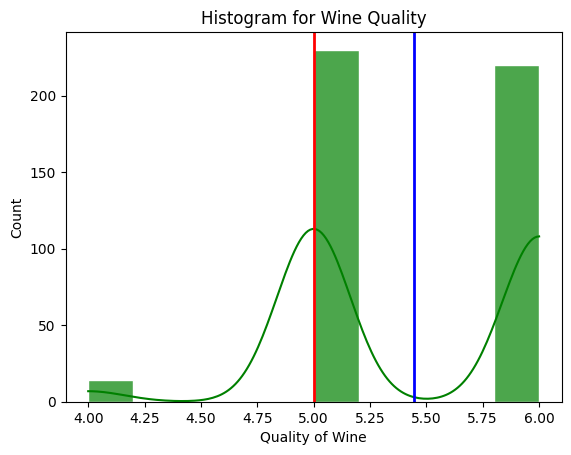

In [17]:
# Check for the histogram for the quality column :
plt.Figure(figsize=(6, 8))
sns.histplot(data=df , x=df.quality , edgecolor  ="white" , kde = True , alpha = 0.7 , color="green")
plt.xlabel("Quality of Wine")
plt.ylabel("Count")
plt.title("Histogram for Wine Quality")
plt.axvline(df.quality.mean() , color ="blue" , linewidth = 2 , label = 'Mean')
plt.axvline(df.quality.median() , color = "red" , linewidth = 2 , label = "Median")
plt.show()

In [18]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5.0
23,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.9968,3.17,0.53,9.4,5.0
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.43,0.63,9.7,6.0


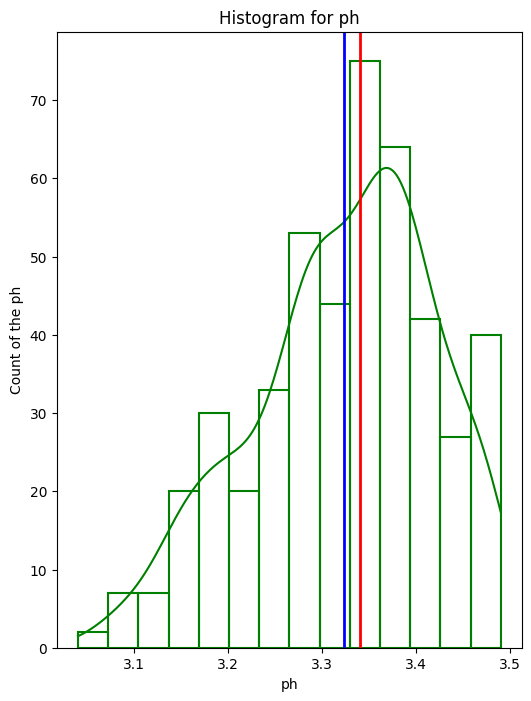

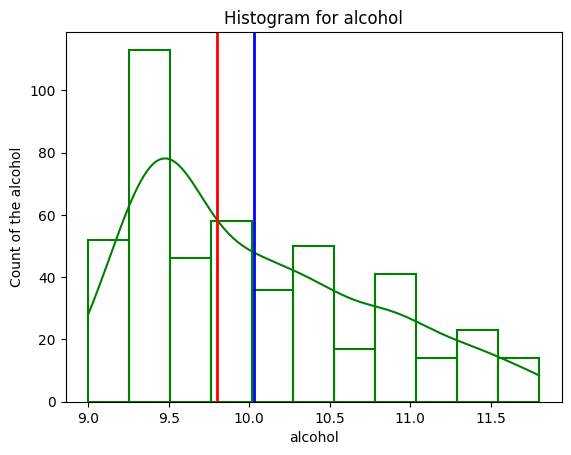

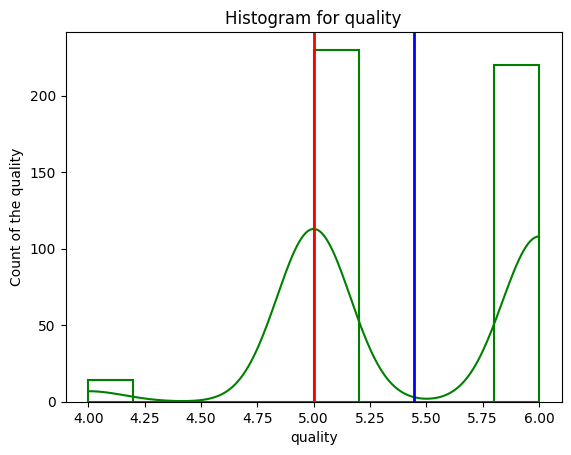

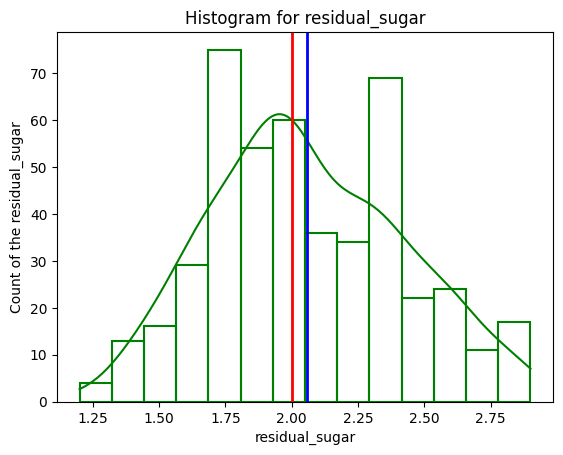

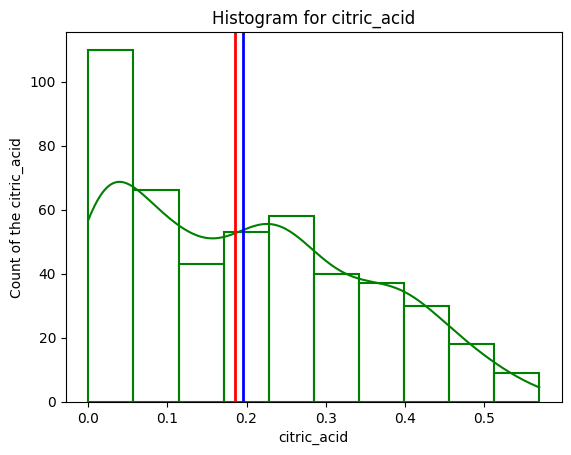

In [21]:
# Since all are in univariate analysis lets make all the graphs in one go only : 
selected_columns  = ['ph' , 'alcohol' , 'quality' , 'residual_sugar' , 'citric_acid' ]

plt.figure(figsize=(6 , 8))

for columnname in selected_columns:
    # plt.figure(figsize=(6 , 8))
    plt.xlabel(columnname)
    plt.ylabel(f"Count of the {columnname}")
    plt.title(f'Histogram for {columnname}')
    sns.histplot(data=df ,x =  df[columnname] , kde=True , color = "green" , fill  = False)
    plt.axvline(df[columnname].mean() , linewidth = 2 , color  = "blue")
    plt.axvline(df[columnname].median() , linewidth = 2 , color ="red")
    plt.show()  



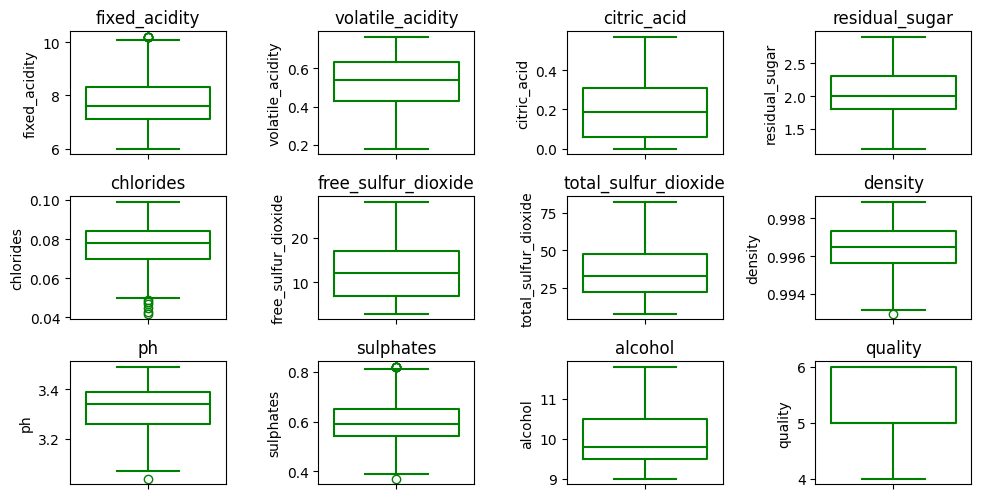

In [20]:
column_names  = df.columns

plt.figure(figsize=(10 , 10))
for i , columnname in enumerate(column_names , 1):
    plt.subplot(6 , 4 , i) # the rows the columns and the position
    sns.boxplot(df[columnname] , color="green" , linecolor="grey" , fill=False)
    plt.title(columnname)

plt.tight_layout()
plt.show()

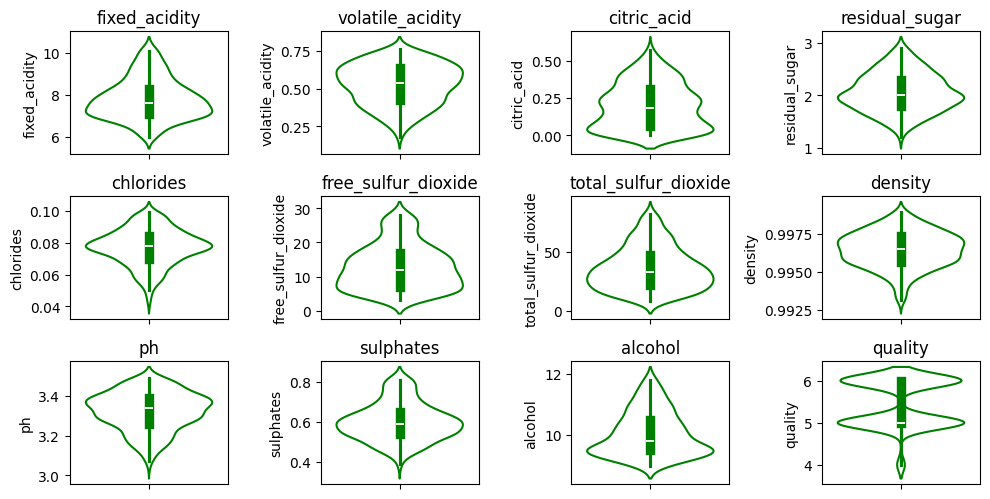

In [22]:
plt.figure(figsize=(10 , 10))

for i ,  columnname in enumerate(column_names ,  1):
    plt.subplot(6 , 4, i)
    sns.violinplot(df[columnname] , color="green" ,  linecolor="grey" , fill=False) 
    plt.title(columnname)

plt.tight_layout()
plt.show()

In [23]:
# Lets do skew and Kurtosis analysis : 
skew_values  = df.apply(lambda x:  skew(x))
kurtosis_values  = df.apply(lambda x : kurtosis(x))

summary  = pd.DataFrame({"skewness" : skew_values , "Kurtosis" : kurtosis_values})

print(summary)

                      skewness  Kurtosis
fixed_acidity         0.564477 -0.255870
volatile_acidity     -0.318549 -0.744233
citric_acid           0.398272 -0.899175
residual_sugar        0.209016 -0.552493
chlorides            -0.393180  0.042670
free_sulfur_dioxide   0.581426 -0.497421
total_sulfur_dioxide  0.627212 -0.376968
density              -0.321658 -0.141297
ph                   -0.446209 -0.397286
sulphates             0.415970 -0.257778
alcohol               0.677272 -0.526935
quality              -0.309551 -0.925816


Now as we know that : for the values of skewness if  x > 0.5 then the dataset is right skewed if x < - 0.5 then the data is Left Skewed and the values in between the dataset ins Normal 
<br>
For Kurtosis we can see that for the values of kurtosis if x > 0 Leptokurtic ( sharp edge ) Heavy Tails and oif x < 0 platykurtic ( Flat Edge ) ( Light Tails ) or else Mesokurtic ( Normal Bell Curve)
But values form -1 to 1 are also acceptable and not always the value can be 0 so that is why 

Lets Plot that to see graphically 

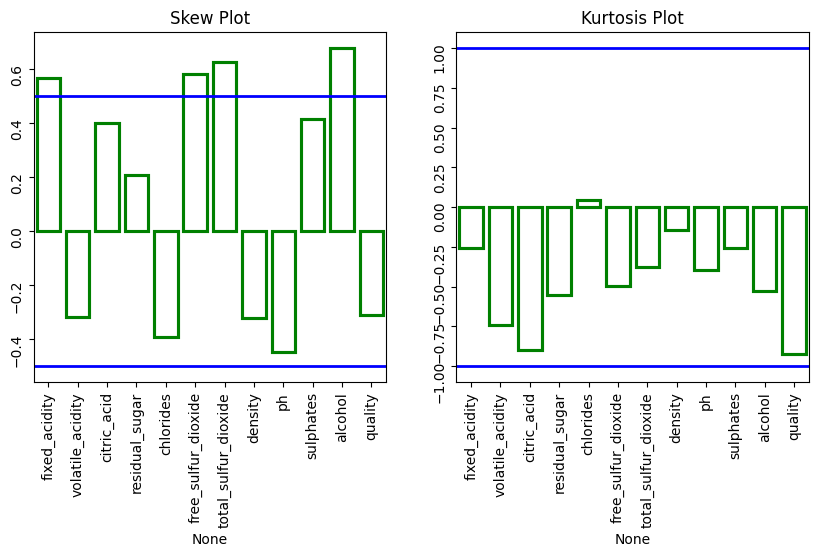

In [25]:
plt.figure(figsize=(10 , 10))
plt.subplot(2 , 2 ,1)
plt.axhline(y = 0.5 , linewidth = 2 , color   = "blue")
plt.axhline( y = -0.5 , linewidth  =2 , color = "blue")
sns.barplot(x = skew_values.index , y = skew_values.values , color="green" , fill=False)
plt.xticks(rotation = 90)
plt.yticks(rotation  = 90)
plt.title("Skew Plot")

plt.subplot(2 , 2 ,2 )
plt.axhline( y = 1 , linewidth = 2  , color = "blue")
plt.axhline( y = -1 , linewidth = 2 ,  color = "blue")
sns.barplot(x = kurtosis_values.index , y = kurtosis_values.values , color="green" , fill=False)
plt.xticks(rotation  = 90)
plt.yticks(rotation = 90)
plt.title("Kurtosis Plot")
plt.show()

Now as per the grpah we can see that the columns are good enough and are normally distributed but for skewness we can see some or the columns would be needing normalizaiton at the time of creating machine learning model 

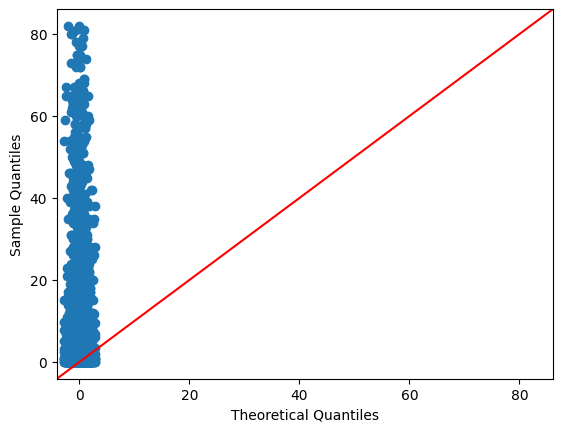

In [26]:
sm.qqplot(df , line = '45')
plt.show()

Lets do one more test which is shapiro test just to make sure the dataset is not skewed : 

In [27]:
stat ,  p = shapiro(df)
print(f"shapiro test statistic {stat} and p-value is {p}")


shapiro test statistic 0.586604215322228 and p-value is 1.2730167294585856e-78


Now we have got two values from shapiro test whicha are  :  Test Statistic = 0.5866

p-value = 1.27 × 10⁻⁷⁸ (extremely small)

now as per the results we can see that  :  If p-value > 0.05 → Fail to reject H₀ → Data looks normal

If p-value ≤ 0.05 → Reject H₀ → Data is not normal. But in this case the vlaue of p is really small which means the dataset is not normally distributed

the vlaue of stat is also 0.5 which is far from normal if it is around : 0.95 or near can can say it is normal or else not. 

# Multivariate Analysis 

Steps for the multivariate Analysis : 
<br>

<input type="checkbox"> Check for the graphs - Histogram , Scatter Plot , Line Chart , Bar Chart </input>
<br>
<input type="checkbox"> Try to make graphs for more than 3 variables - 3d Graphs </input>
<br>
<input type="checkbox"> Pair Plot for the variables </input>
<br>
<input type="checkbox"> Correlation Matrix and Heatmap  </input>
<br>
<input type="checkbox"> PCA to check and confirm if the data is good enough for regression </input>
<input type="checkbox"> Tsne check to confirm if the dataset is good enough for clusterig  </input>

Colums for Graphs : 
<br>
alcohol vs quality
<br>
ph vs quality
<br>
density vs quality
<br>
sugar vs quality
<br>
sugar vs alcohol vs quality 

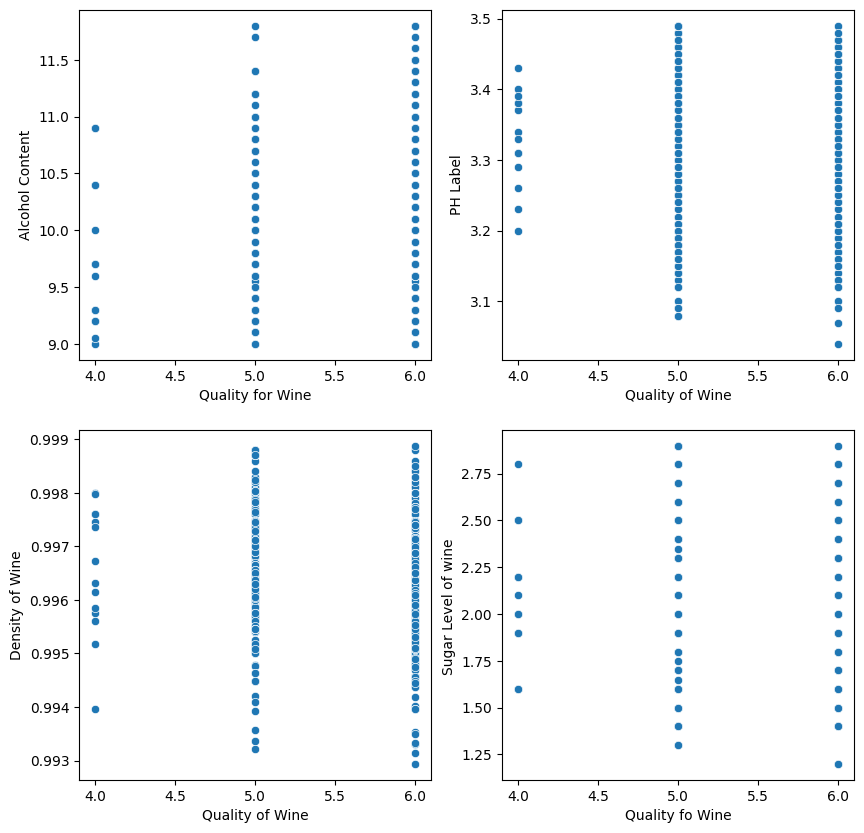

In [28]:
plt.figure(figsize=(10 , 10))
plt.subplot(2 , 2 ,1)
plt.xlabel("Quality for Wine")
plt.ylabel("Alcohol Content")
sns.scatterplot(data=df , x = df.quality , y = df.alcohol)

plt.subplot(2 , 2 ,2)
plt.xlabel("Quality of Wine")
plt.ylabel("PH Label")
sns.scatterplot(data=df, x = df.quality , y=df.ph)

plt.subplot(2 , 2 , 3)
plt.xlabel("Quality of Wine")
plt.ylabel("Density of Wine")
sns.scatterplot(data=df , x=df.quality , y = df.density)

plt.subplot(2 ,2 , 4)
plt.xlabel("Quality fo Wine")
plt.ylabel("Sugar Level of wine ")
sns.scatterplot(data=df , x = df.quality , y = df.residual_sugar)


plt.show()

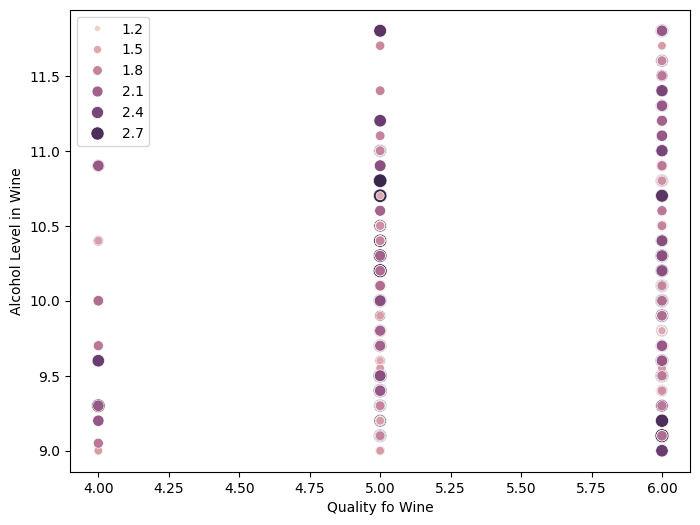

In [29]:
# Make a scatter plot with 3 variabels as one variable as the Hue then : 
plt.figure(figsize=(8 , 6))
sns.scatterplot(data = df  , x = df.quality , y = df.alcohol , hue=df.residual_sugar , size=df.residual_sugar , sizes=(20, 100))
plt.xlabel("Quality fo Wine")
plt.ylabel("Alcohol Level in Wine")
plt.legend()
plt.show()

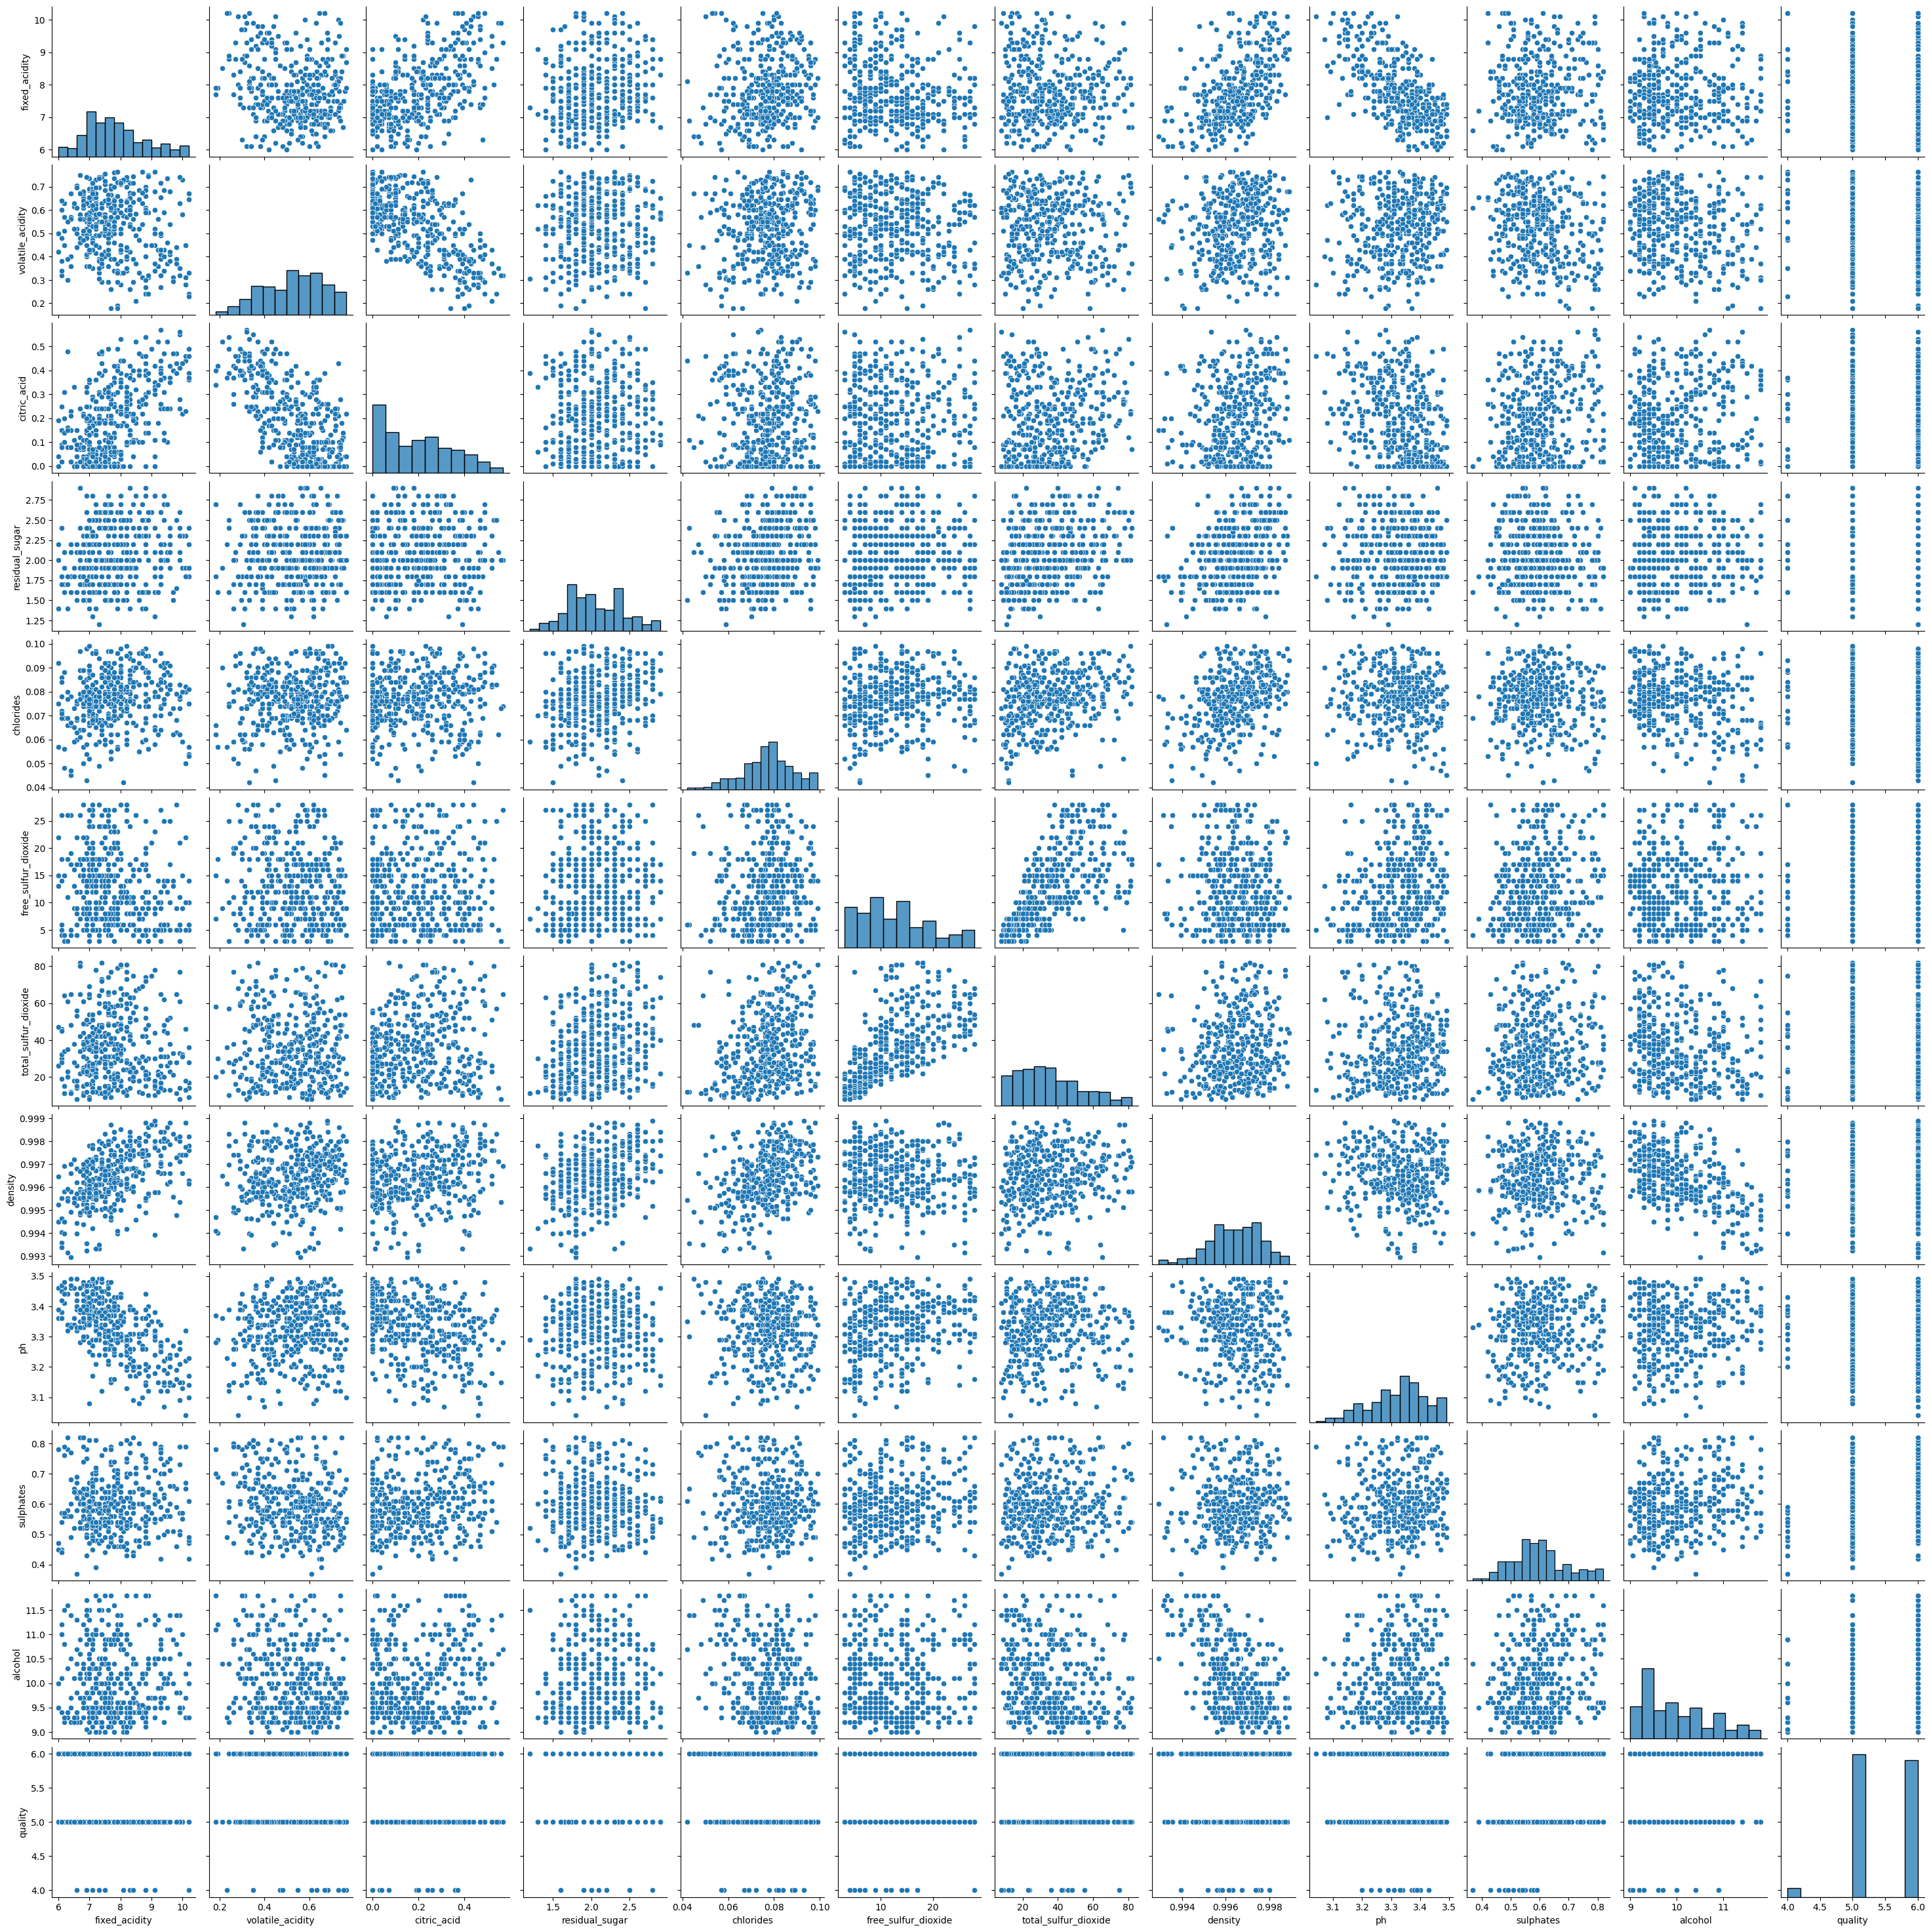

In [30]:
# Lets make a pairplot for the dataframe : 

sns.pairplot(data=df , palette="deep" )

<Figure size 800x800 with 0 Axes>

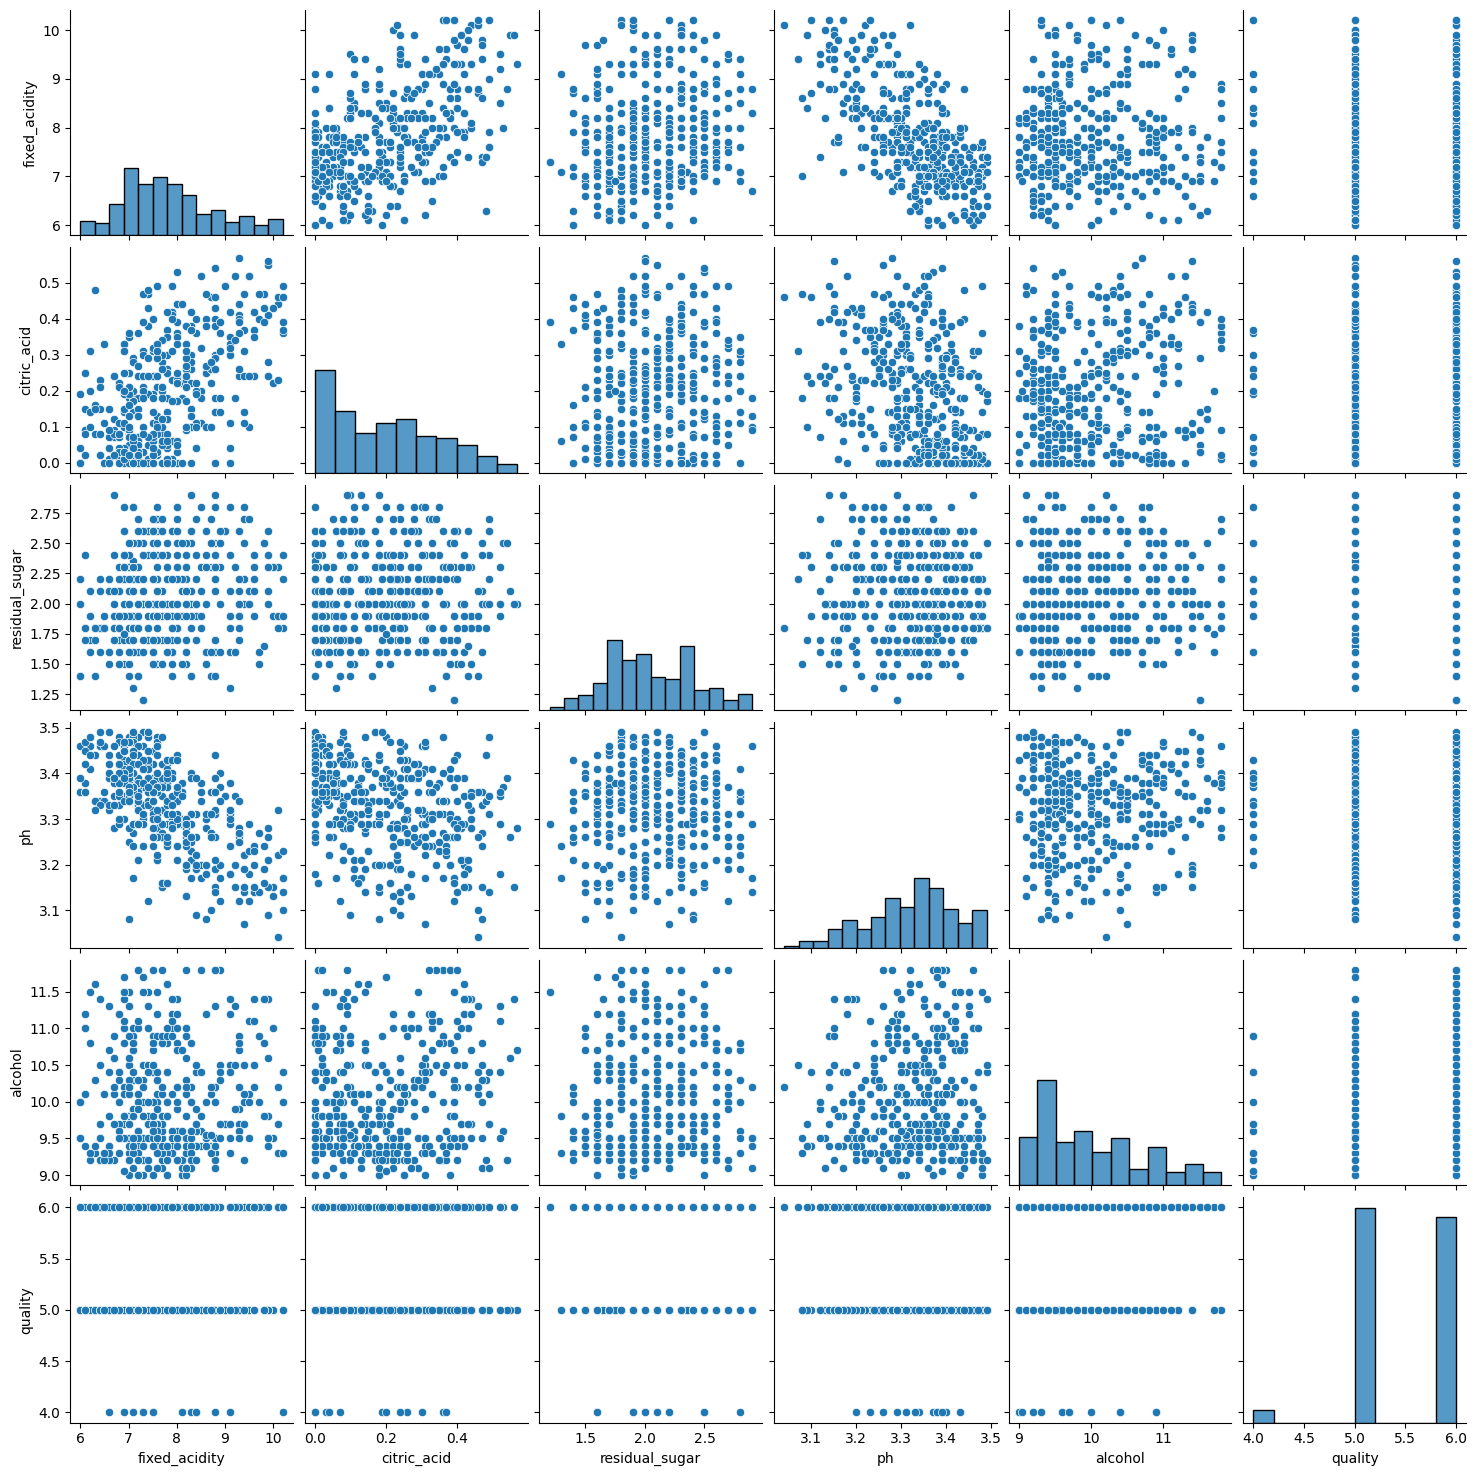

In [31]:
# Lets make the pair plot again for some columns and see how the correlation goes :

plt.figure(figsize=(8 , 8))
sns.pairplot(df[["fixed_acidity", "citric_acid", "residual_sugar" , "ph" ,"alcohol"	, "quality"]])
plt.show()

In [32]:
# Make the correlation : 
correlation  = df.corr()
data_df = pd.DataFrame(correlation)
data_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.152925,0.542886,0.158476,0.114143,-0.177740,0.005641,0.522153,-0.639654,0.034972,-0.013620,-0.023552
volatile_acidity,-0.152925,1.000000,-0.642887,0.099820,0.131862,-0.091705,-0.039940,0.129320,0.093915,-0.181366,-0.168014,-0.192268
citric_acid,0.542886,-0.642887,1.000000,0.057868,0.014686,-0.014261,0.160509,0.208762,-0.322075,0.158866,0.104171,0.051452
residual_sugar,0.158476,0.099820,0.057868,1.000000,0.218572,0.101370,0.262658,0.338772,0.007143,-0.028737,0.109275,0.004676
chlorides,0.114143,0.131862,0.014686,0.218572,1.000000,0.105653,0.246094,0.382721,-0.039116,-0.060406,-0.257720,-0.015676


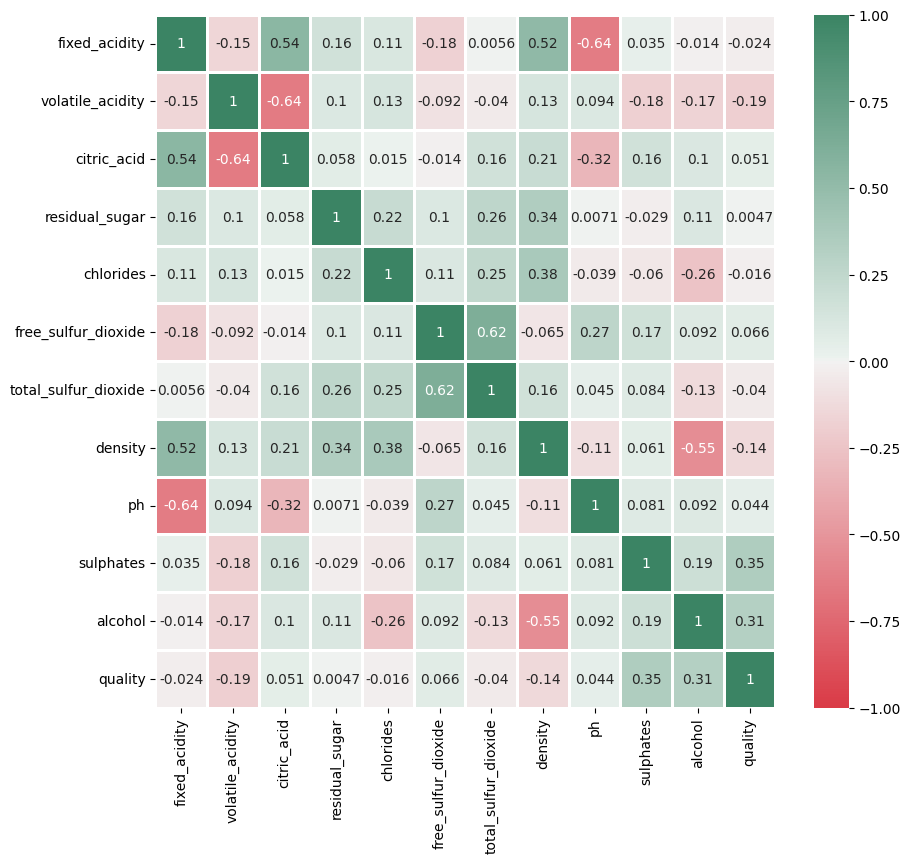

In [33]:
# Lets make a heatmap : 

plt.figure(figsize=(10  , 9))
cmap = sns.diverging_palette(10, 150 , as_cmap=True)
sns.heatmap(correlation , annot=True , vmin=-1 , vmax=1  , center = 0 , linewidths=2 , linecolor='white' ,  cmap=cmap)
plt.show()

we can see there is some string correlaton in between free sulphur dioxide and alcohol and sulphates and that affects quality. 

In [34]:
scaler  = StandardScaler()
x_scaled  = scaler.fit_transform(df)

pca  = PCA(n_components=None)
pca_values = pca.fit_transform(x_scaled)

pca_names = pd.DataFrame(
    pca.components_.T,            # transpose so features align with components
    columns=[f"PC{i+1}" for i in range(len(df.columns))],
    index=df.columns
)
print(pca_names)


                           PC1       PC2       PC3       PC4       PC5  \
fixed_acidity         0.529112 -0.143234 -0.153524  0.110889  0.120140   
volatile_acidity     -0.143586  0.485681 -0.091007  0.344675  0.125851   
citric_acid           0.405707 -0.393238  0.051745 -0.235578  0.001181   
residual_sugar        0.204761  0.128071  0.259753  0.410454  0.539063   
chlorides             0.243397  0.286682  0.213758  0.175962 -0.101826   
free_sulfur_dioxide  -0.064304 -0.003133  0.595106 -0.245457  0.067976   
total_sulfur_dioxide  0.155027  0.099348  0.557201 -0.269894  0.126367   
density               0.461710  0.282032  0.062420  0.198718 -0.270896   
ph                   -0.377363  0.128898  0.293906  0.043296 -0.190315   
sulphates             0.014672 -0.292986  0.256618  0.336817 -0.493411   
alcohol              -0.208666 -0.430169  0.072418  0.263839  0.496458   
quality              -0.078438 -0.336824  0.162200  0.506417 -0.220566   

                           PC6       

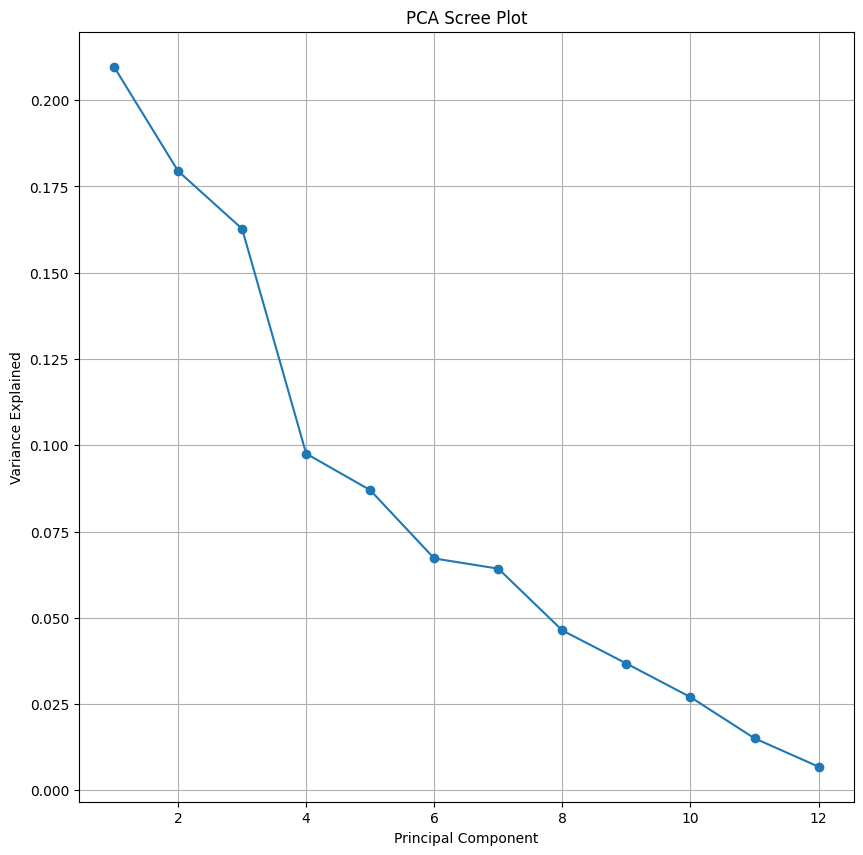

In [35]:
# Lets check for the variables  : 
plt.figure(figsize=(10 , 10))
plt.plot(range(1 ,len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker = "o")

plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Scree Plot")
plt.grid()
plt.show()

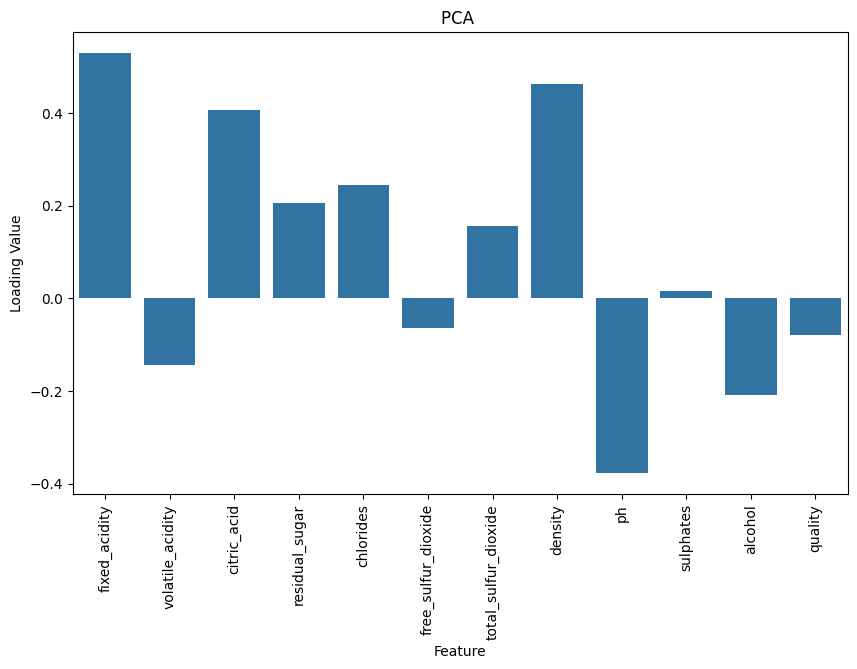

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=pca_names.index, y=pca_names["PC1"])
plt.xticks(rotation=90)
plt.title("PCA ")
plt.ylabel("Loading Value")
plt.xlabel("Feature")
plt.show()

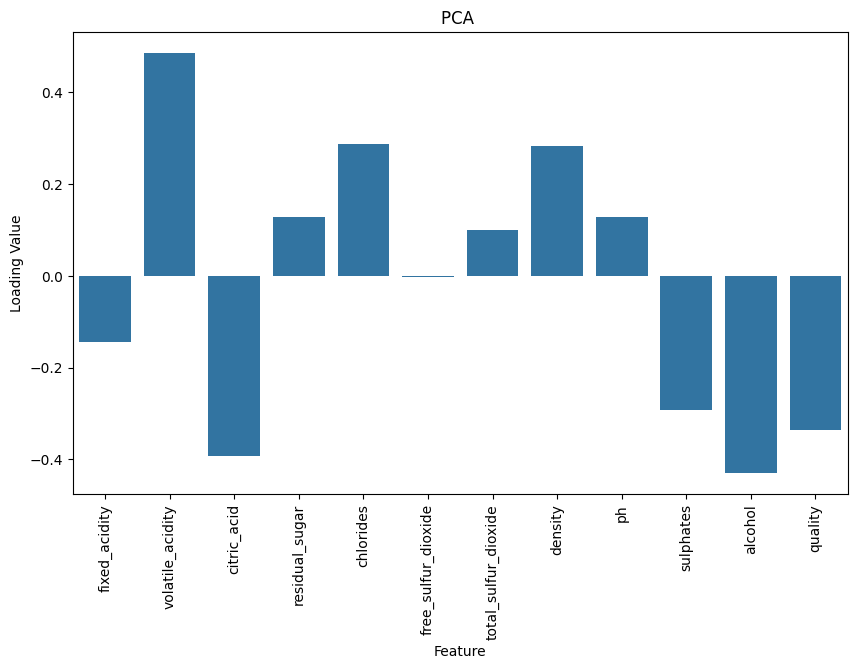

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=pca_names.index, y=pca_names["PC2"])
plt.xticks(rotation=90)
plt.title("PCA ")
plt.ylabel("Loading Value")
plt.xlabel("Feature")
plt.show()

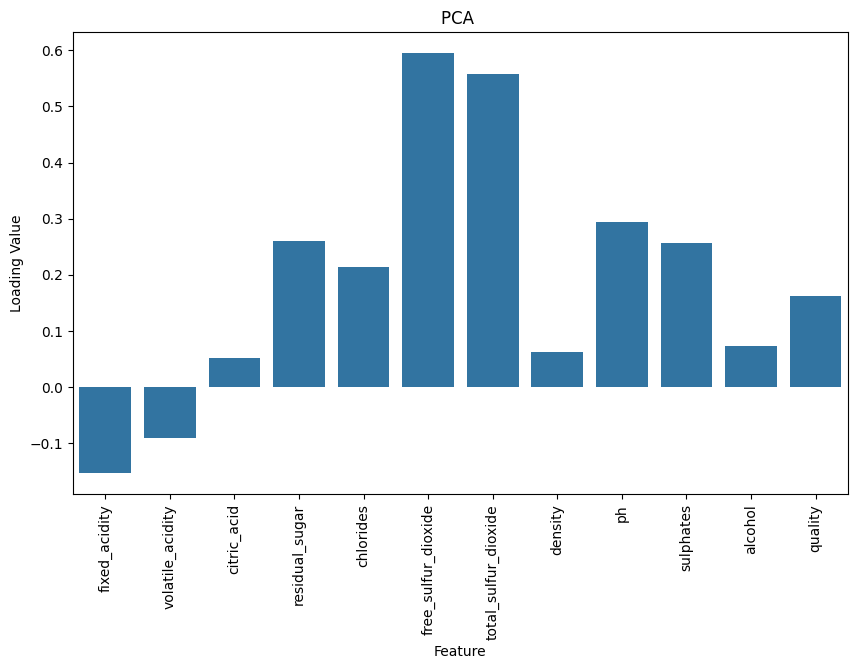

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=pca_names.index, y=pca_names["PC3"])
plt.xticks(rotation=90)
plt.title("PCA ")
plt.ylabel("Loading Value")
plt.xlabel("Feature")
plt.show()

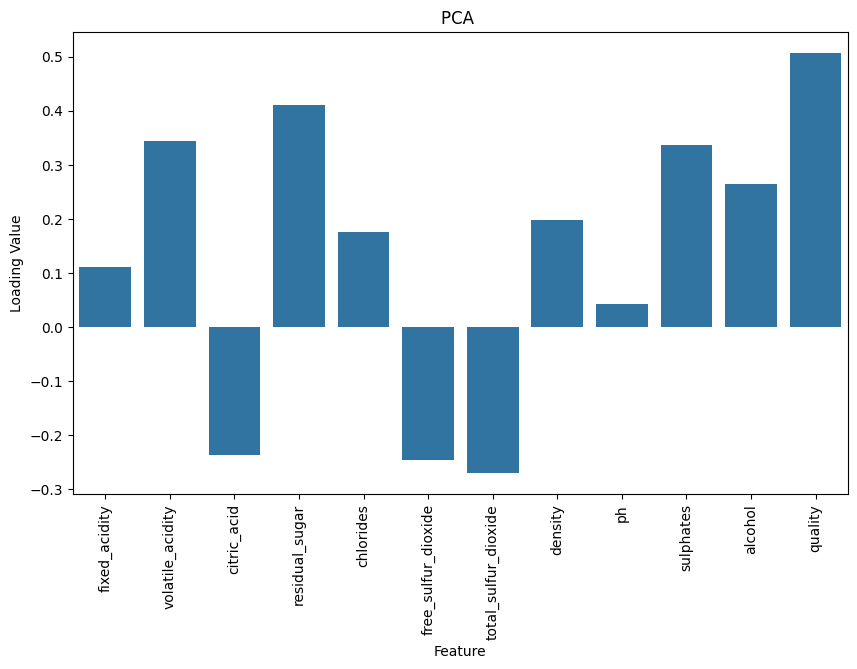

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=pca_names.index, y=pca_names["PC4"])
plt.xticks(rotation=90)
plt.title("PCA ")
plt.ylabel("Loading Value")
plt.xlabel("Feature")
plt.show()

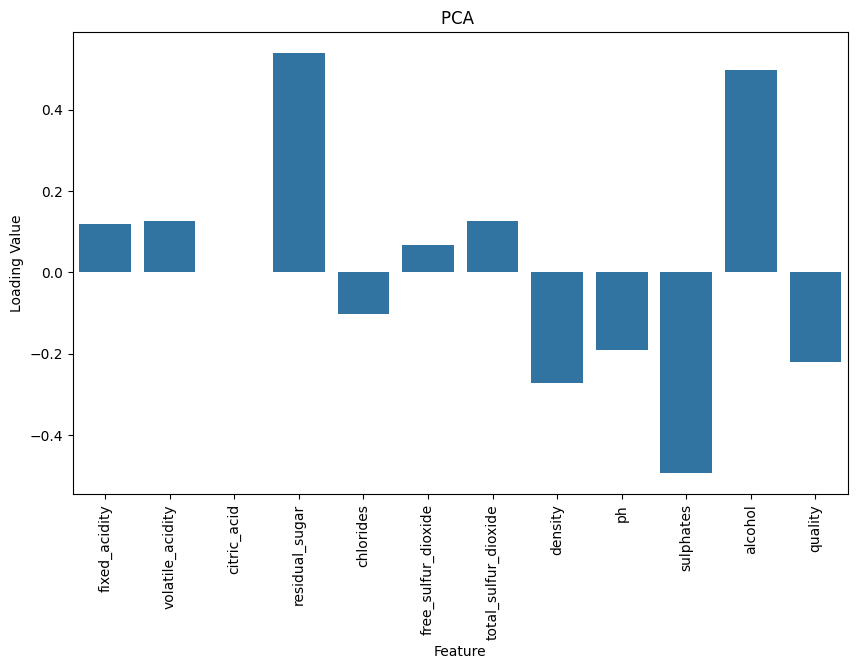

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=pca_names.index, y=pca_names["PC5"])
plt.xticks(rotation=90)
plt.title("PCA ")
plt.ylabel("Loading Value")
plt.xlabel("Feature")
plt.show()

In [43]:
# Lets Implement the TSNE test to check and cofirm if the datset is good enboughfor clustering models  : 
tsne  = TSNE(n_components=2 , perplexity=30 , learning_rate=200 , max_iter=1000, random_state=42)
tsne_results  = tsne.fit_transform(x_scaled)


tsne_dataframe   = pd.DataFrame({
    "TSNE1" : tsne_results[:,0],
    "TSNE2" : tsne_results[:,1]
})

tsne_dataframe.head()

,TSNE1,TSNE2
0,-40.514267,10.240382
1,-7.976008,-32.626186
2,-24.026236,-37.781296
3,-19.698399,-12.819142
4,-49.538120,-21.668653


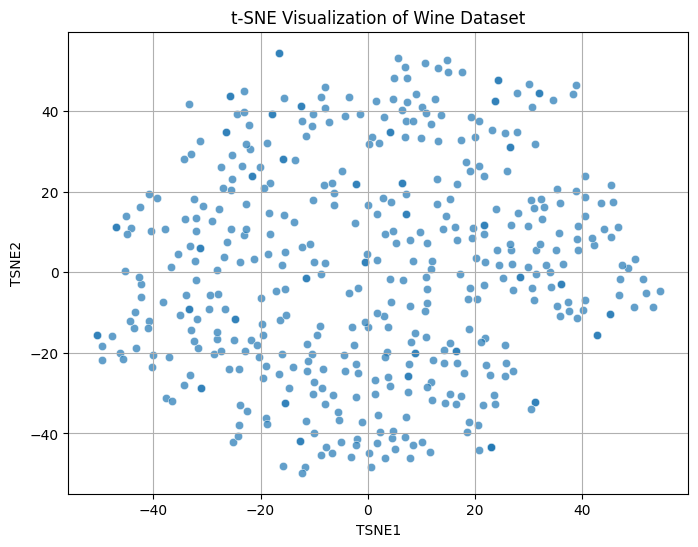

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_dataframe,
    x="TSNE1",
    y="TSNE2",
    hue="quality" if "quality" in tsne_dataframe.columns else None,
    palette="viridis",
    alpha=0.7
)
plt.title("t-SNE Visualization of Wine Dataset")
plt.grid(True)
plt.show()

As per the tsne test we can see that there are not natural clusters in the dataset. Just to reconfirm this lets do one more test in the dataset. 

we can do the hopkins Test
<br>